<a href="https://colab.research.google.com/github/TarunMadan93/CreditScorecard/blob/master/credit_scorecard_devlopment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials
#Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1-ViHvO73jWoSS4ZvDJ0Vw6yajTKOMwHM'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('train_data.csv')
df = pd.read_csv("train_data.csv")

In [23]:
#explore the training dataset
df.drop(columns = 'Unnamed: 0', axis=1, inplace=True)
print(df.shape)
print(list(df.columns))
for c in df.columns:
  print(c)
  try:
    print('Max:', df[c].max())
    print('Min:', df[c].min())
  except:
    pass

(150000, 11)
['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
SeriousDlqin2yrs
Max: 1
Min: 0
RevolvingUtilizationOfUnsecuredLines
Max: 50708.0
Min: 0.0
age
Max: 109
Min: 0
NumberOfTime30-59DaysPastDueNotWorse
Max: 98
Min: 0
DebtRatio
Max: 329664.0
Min: 0.0
MonthlyIncome
Max: 3008750.0
Min: 0.0
NumberOfOpenCreditLinesAndLoans
Max: 58
Min: 0
NumberOfTimes90DaysLate
Max: 98
Min: 0
NumberRealEstateLoansOrLines
Max: 54
Min: 0
NumberOfTime60-89DaysPastDueNotWorse
Max: 98
Min: 0
NumberOfDependents
Max: 20.0
Min: 0.0


SeriousDlqin2yrs


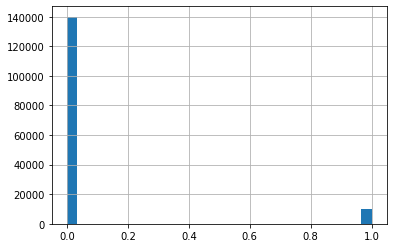



RevolvingUtilizationOfUnsecuredLines


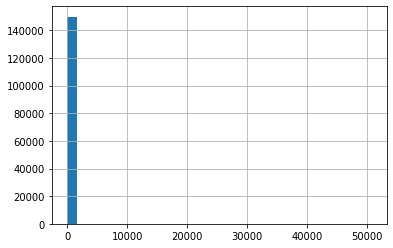



age


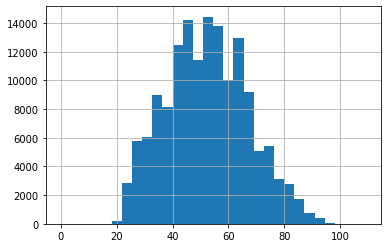



NumberOfTime30-59DaysPastDueNotWorse


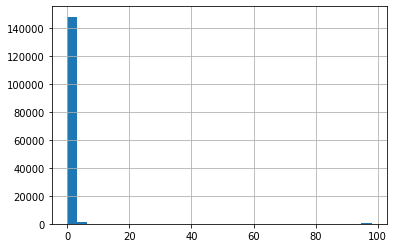



DebtRatio


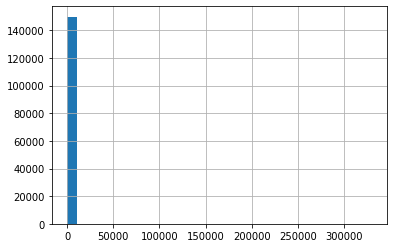



MonthlyIncome


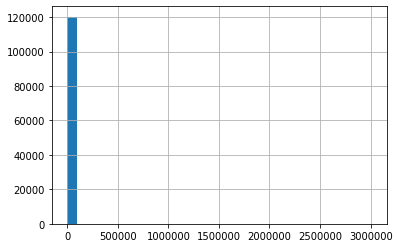



NumberOfOpenCreditLinesAndLoans


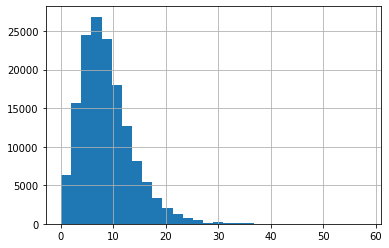



NumberOfTimes90DaysLate


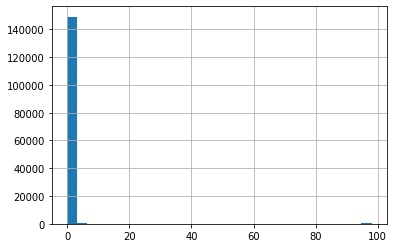



NumberRealEstateLoansOrLines


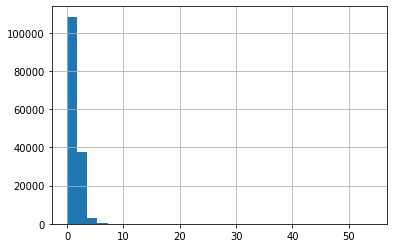



NumberOfTime60-89DaysPastDueNotWorse


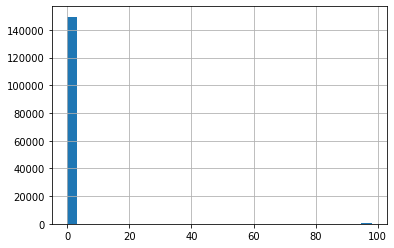



NumberOfDependents


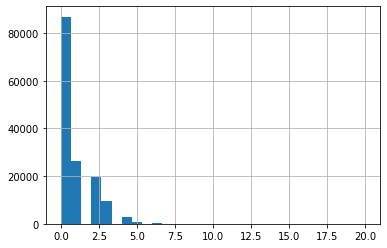

In [28]:
for c in df.columns:
  print(c)
  df[c].hist(bins=30)
  plt.show()
  print('\n')

In [31]:
df.loc[(df['age']<18)]['age'].value_counts()

0    1
Name: age, dtype: int64

In [32]:
df['age'].median()

52.0

In [34]:
for c in df.columns:
  if df[c].isnull().sum() > 0:
    print(c)


MonthlyIncome
NumberOfDependents


In [36]:
for c in df.columns:
  if df.loc[(df[c]== '.')].shape[0] > 0:
    print(c)


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [37]:
for c in df.columns:
  print(c)
  print(df.loc[df[c].isnull()].shape[0]) 
  print('\n')

SeriousDlqin2yrs
0


RevolvingUtilizationOfUnsecuredLines
0


age
0


NumberOfTime30-59DaysPastDueNotWorse
0


DebtRatio
0


MonthlyIncome
29731


NumberOfOpenCreditLinesAndLoans
0


NumberOfTimes90DaysLate
0


NumberRealEstateLoansOrLines
0


NumberOfTime60-89DaysPastDueNotWorse
0


NumberOfDependents
3924




In [43]:
print(df.loc[df['RevolvingUtilizationOfUnsecuredLines'] > 1].shape)
df.loc[df['RevolvingUtilizationOfUnsecuredLines'] <= 1].max() 

(3321, 11)


SeriousDlqin2yrs                              1.0
RevolvingUtilizationOfUnsecuredLines          1.0
age                                         109.0
NumberOfTime30-59DaysPastDueNotWorse         98.0
DebtRatio                                329664.0
MonthlyIncome                           3008750.0
NumberOfOpenCreditLinesAndLoans              58.0
NumberOfTimes90DaysLate                      98.0
NumberRealEstateLoansOrLines                 54.0
NumberOfTime60-89DaysPastDueNotWorse         98.0
NumberOfDependents                           20.0
dtype: float64

In [40]:
df.median()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64